In [1]:
print("he")

he


In [2]:
import sys
!{sys.executable} -m pip install sseclient

  Stored in directory: /home/jovyan/.cache/pip/wheels/fc/b8/5c/c7e0a8161e61dc1ab00c0b5a1a34a3887eb47170ae1a46f7b1
Successfully built sseclient


In [9]:
import sys
!{sys.executable} -m pip install bs4

    100% |████████████████████████████████| 102kB 2.7MB/s a 0:00:011
    100% |████████████████████████████████| 92kB 11.0MB/s ta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [28]:
import sys
!{sys.executable} -m pip install matplotlib

    100% |████████████████████████████████| 13.0MB 211kB/s eta 0:00:01
    100% |████████████████████████████████| 17.3MB 128kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 24.0MB/s ta 0:00:01
    100% |████████████████████████████████| 952kB 7.4MB/s eta 0:00:01


In [3]:
import json
from sseclient import SSEClient as EventSource

url = 'https://stream.wikimedia.org/v2/stream/recentchange'
count = 0
finaldocuments={}
documents=[]
for event in EventSource(url):
    if event.event == 'message':
        count = count + 1
        try:
            change = json.loads(event.data)
        except ValueError:
            pass
        else:
            print('{user} edited {title}'.format(**change))
            print(change)
            microdict={}
            microdict['language']= "en"
            microdict['text']=json.dumps(change)
            microdict['id']=count
            #print(microdict)
            documents.append(microdict)
            if count >10:
                break
finaldocuments['documents']=documents


Giorgio Michele edited Category:Ottos Eck
{'bot': False, 'comment': 'new cat', 'id': 1196043841, 'length': {'new': 260, 'old': None}, 'meta': {'domain': 'commons.wikimedia.org', 'dt': '2019-03-06T12:20:16+00:00', 'id': '32f0d236-400a-11e9-84f4-141877613bad', 'request_id': '80b9f5a3-06b5-4b5c-b720-df62e5cd52ac', 'schema_uri': 'mediawiki/recentchange/2', 'topic': 'eqiad.mediawiki.recentchange', 'uri': 'https://commons.wikimedia.org/wiki/Category:Ottos_Eck', 'partition': 0, 'offset': 1433347363}, 'minor': False, 'namespace': 14, 'parsedcomment': 'new cat', 'patrolled': True, 'revision': {'new': 341707596, 'old': None}, 'server_name': 'commons.wikimedia.org', 'server_script_path': '/w', 'server_url': 'https://commons.wikimedia.org', 'timestamp': 1551874816, 'title': 'Category:Ottos Eck', 'type': 'new', 'user': 'Giorgio Michele', 'wiki': 'commonswiki'}
Renamerr edited Q34348092
{'bot': True, 'comment': '/* wbsetdescription-set:1|uk */ наукова стаття, опублікована в червні 2013, #quickstatem

In [4]:
print(finaldocuments)

{'documents': [{'language': 'en', 'text': '{"bot": false, "comment": "new cat", "id": 1196043841, "length": {"new": 260, "old": null}, "meta": {"domain": "commons.wikimedia.org", "dt": "2019-03-06T12:20:16+00:00", "id": "32f0d236-400a-11e9-84f4-141877613bad", "request_id": "80b9f5a3-06b5-4b5c-b720-df62e5cd52ac", "schema_uri": "mediawiki/recentchange/2", "topic": "eqiad.mediawiki.recentchange", "uri": "https://commons.wikimedia.org/wiki/Category:Ottos_Eck", "partition": 0, "offset": 1433347363}, "minor": false, "namespace": 14, "parsedcomment": "new cat", "patrolled": true, "revision": {"new": 341707596, "old": null}, "server_name": "commons.wikimedia.org", "server_script_path": "/w", "server_url": "https://commons.wikimedia.org", "timestamp": 1551874816, "title": "Category:Ottos Eck", "type": "new", "user": "Giorgio Michele", "wiki": "commonswiki"}', 'id': 2}, {'language': 'en', 'text': '{"bot": true, "comment": "/* wbsetdescription-set:1|uk */ \\u043d\\u0430\\u0443\\u043a\\u043e\\u043

In [6]:

subscription_key = "3d80e125aeba44739c7d9b62c9c02c30"
assert subscription_key
text_analytics_base_url = "https://westeurope.api.cognitive.microsoft.com/text/analytics/v2.1-preview/entities"

In [7]:
import requests
from pprint import pprint
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(text_analytics_base_url, headers=headers, json=finaldocuments)
entitities = response.json()
pprint(entitities['documents'][0])

{'entities': [{'matches': [{'length': 3, 'offset': 2, 'text': 'bot'}],
               'name': 'bot',
               'type': 'Location'},
              {'matches': [{'length': 10, 'offset': 43, 'text': '1196043841'}],
               'name': '1196043841',
               'subType': 'Number',
               'type': 'Quantity'},
              {'matches': [{'length': 3, 'offset': 73, 'text': '260'}],
               'name': '260',
               'subType': 'Number',
               'type': 'Quantity'},
              {'bingId': 'edf11b56-c860-73db-6b81-889ac128cb17',
               'matches': [{'length': 21,
                            'offset': 112,
                            'text': 'commons.wikimedia.org'}],
               'name': 'Wikimedia Commons',
               'wikipediaId': 'Wikimedia Commons',
               'wikipediaLanguage': 'en',
               'wikipediaUrl': 'https://en.wikipedia.org/wiki/Wikimedia_Commons'},
              {'matches': [{'length': 19,
                         

In [12]:

from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup


def simple_get(url):
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    print(e)

In [13]:
def scrapindeed(urlservices):
  total=[]
  raw_html = simple_get(urlservices)
  myhtml = BeautifulSoup(raw_html, 'html.parser')
  tabulka = myhtml.findAll("div",  {"class" : "cmp-review-container"})
  for container in tabulka:
      partial=[]
      tittle = container.find("div",  {"class" : "cmp-review-title"})
      tittle = tittle.text
      partial.append(tittle)
      subtittle = container.find("div",  {"class" : "cmp-review-subtitle"})
      subtittle = subtittle.text
      partial.append(subtittle)
      freetext = container.find("span",  {"class" : "cmp-review-text"})
      myfreetext = freetext.text
      partial.append(myfreetext)
      protext = container.find("div",  {"class" : "cmp-review-pro-text"})
      if protext is not None:
          protext = protext.text
      else:
          protext=""
      partial.append(protext)
      constext = container.find("div",  {"class" : "cmp-review-con-text"})
      if constext is not None:
          constext= constext.text
      else:
          constext=""
      partial.append(constext)
      total.append(partial)
      print("#########")
  return(total)

In [14]:
urlservices= "https://www.indeed.co.uk/cmp/Microsoft/reviews?fcountry=ALL"
total =scrapindeed(urlservices)

#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########
#########


In [15]:
print(total[0][2])

Good culture & great flexibility. Can be a little hard to get promotions and forward career.Company definitely changed over etc years, less autonomy at a local level and more direction form corporate.


In [16]:
count=0
count = 0
finaldocuments={}
documents=[]
for doc in total:
    count = count + 1
    microdict={}
    microdict['language']= "en"
    microdict['text']=doc[2]
    microdict['id']=count
            #print(microdict)
    documents.append(microdict)

finaldocuments['documents']=documents


In [20]:

    
subscription_key = "3d80e125aeba44739c7d9b62c9c02c30"
assert subscription_key
text_analytics_base_url = "https://westeurope.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment"

In [21]:
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(text_analytics_base_url, headers=headers, json=finaldocuments)
sentiments = response.json()
pprint(sentiments['documents'])

[{'id': '1', 'score': 0.24263864755630493},
 {'id': '2', 'score': 0.900293231010437},
 {'id': '3', 'score': 0.7533862590789795},
 {'id': '4', 'score': 0.9833383560180664},
 {'id': '5', 'score': 0.9917384386062622},
 {'id': '6', 'score': 0.18718767166137695},
 {'id': '7', 'score': 0.9208264350891113},
 {'id': '8', 'score': 0.9352567195892334},
 {'id': '9', 'score': 0.9177365303039551},
 {'id': '10', 'score': 0.9764247536659241},
 {'id': '11', 'score': 0.9955078363418579},
 {'id': '12', 'score': 0.8605165481567383},
 {'id': '13', 'score': 0.14737674593925476},
 {'id': '14', 'score': 0.5},
 {'id': '15', 'score': 0.9474412798881531},
 {'id': '16', 'score': 0.9420700073242188},
 {'id': '17', 'score': 0.5},
 {'id': '18', 'score': 0.8775898218154907},
 {'id': '19', 'score': 0.8037079572677612},
 {'id': '20', 'score': 0.876105546951294},
 {'id': '21', 'score': 0.9323774576187134}]


In [30]:
totalscoreslist=[]
totalindex=[]
averagescore = len(sentiments['documents'])
totalscore = 0
for k in sentiments['documents']:
    totalscore=totalscore + k['score']
    totalscoreslist.append(k['score'])
    totalindex.append(k['id'])
    

In [31]:
print(totalscore/averagescore)

0.7710247735182444


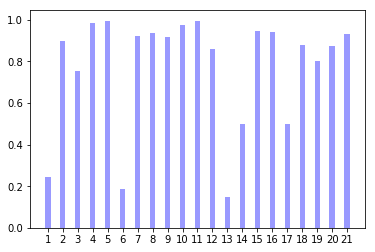

In [35]:
bar_width = 0.35
opacity = 0.4
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rects1 = ax.bar(totalindex, totalscoreslist, bar_width,
                alpha=opacity, color='b',
                label='Scores')

In [36]:
print(json.dumps(finaldocuments,indent=1))

{
 "documents": [
  {
   "language": "en",
   "text": "Good culture & great flexibility. Can be a little hard to get promotions and forward career.Company definitely changed over etc years, less autonomy at a local level and more direction form corporate.",
   "id": 1
  },
  {
   "language": "en",
   "text": "Microsoft is a great company to work for with very talented people. The culture is typical american where you work hard and are measured on performance , however there is alot of fun and the enviroment is fantastic.I learned a lot about delivering results against plans, strategies and timelines as well as the power of teamwork and collaboration",
   "id": 2
  },
  {
   "language": "en",
   "text": "Overall Microsoft has been a great company to work for.  The work life balance is just about right and the pay and benefits are comparable to other companies.",
   "id": 3
  },
  {
   "language": "en",
   "text": "Superb company to work for, fond memories. Fantastic benefits and facilit